# EDA na prática! 😎

### **Descrição:**
Agora que você já sabe os básicos do por quê precisamos de dados limpos, bem estruturados e como trabalhar com um conjunto de dados até chegar nessa etapa, que tal testar as nossas novas habilidades em um dataset real? Hoje, o nosso objetivo será limpar e extrair alguns insights do conjunto de dados da tragédia mais esquisita do mundo das navegações, o [Titanic](https://www.kaggle.com/c/titanic/overview)! Esse dataset vai incluir as seguintes informações:

|                Coluna                | Descrição |
|:------------------------------------:|:---------:|
|                  Survived                 |    Sobrevivência ou não (0 - não; 1- sim)       |
|                  Pclass                 |    Tipo de passagem (1a, 2a ou 3a classe)    |
|          SibSp   |    No. de irmãos/cônjuges a bordo do Titanic       |
| Parch |    No. de pais/filhos a bordo do Titanic       |
|      Ticket   |      No. do tíquete    |
|       Fare       |    Tarifa de passageiro       |
|                Cabin               |       Número da cabine    |
|    Embarked  |      Porto de embarcação (C - Cherbourg, Q - Queenstown, S - Southampton)     |


Essa próxima etapa deve deixar algumas pessoas com frio na barriga, mas relaxa que temos tempo mais que suficiente para explorar esses dados.
#### Ps: Esse é muito melhor de entender do que o dos cachorros 😉

### 1.1 - Leitura dos dados e realização de descrição estatística
---

A seguir, o dataframe já estará montado pelo método `pd.read_csv()` da biblioteca `pandas`, a partir da execução da célula.

Dica: Você pode acessar a documentação da biblioteca `pandas` [clicando aqui](https://pandas.pydata.org/docs/getting_started/index.html#getting-started). Após o processamento do dataframe, você terá de realizar uma descrição estatística dos dados.
/
#### Lembrando! A descrição estatística nada mais é do que mostrar como os valores estão distribuídos, então pode usar quaisquer método achar suficiente para fazer isso, e lembrando, **menos e melhor** é a chave para uma boa análise! 😁

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
df = pd.read_csv('https://raw.githubusercontent.com/IcaroR/TRILha/main/datasets/Titanic/train.csv', sep = ',')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [174]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 1.2 - Limpeza dos dados
---



#### Agora que já conseguimos ter uma visão do panorâmica dos dados, conseguimos ver que eles estão uma porcaria, então que tal dar uma faxina neles? Remova todos os erros, como dados faltantes, colunas com tipos errados, etc. Mais uma vez, a leitura da documentação do `pandas` é imprescindível.

1.2.1 Tratando NaN's e modificando colunas

In [175]:
# Tratar os NaN da coluna de idades, trocando pela média
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [176]:
# Trocar as idades que estão como float para inteiro
df["Age"] = df['Age'].astype(int)

In [177]:
# Dentro da coluna de sexo, trocar male por 0 e female por 1
df["Sex"] = df["Sex"].replace({"male": 0, "female": 1})

In [178]:
# Como nós já sabemos a classe dos passageiros, e a maioria dos valores da coluna Cabin são NaN, faz sentido apagar a coluna, ela não será muito relevante para nós
df = df.drop("Cabin", axis=1)

In [179]:
# Ver quais linhas tem NaN em Embarked
linha_com_nan = df[df['Embarked'].isna()]
linha_com_nan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62,0,0,113572,80.0,NaN


In [180]:
# Como vimos anteriormente que há só 2 embarcados que são NaN e os outros valores dessa linha não são muito "únicos", vamos simplesmente dropar essas duas linhas
df = df.dropna(subset=['Embarked'])

In [181]:
# Verificar se ainda há valores não nulos aṕos o nosso tratamento
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          889 non-null    int64  
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 83.3+ KB


In [182]:
# Outro dado que considero inútil para o nosso modelo é o ID do passageiro e caso a gente precise é só somar 1 ao índice da linha, então vou apagar a coluna "PassangerId"
df = df.drop("PassengerId", axis=1)

1.2.2 Verificando e tratando Outliers

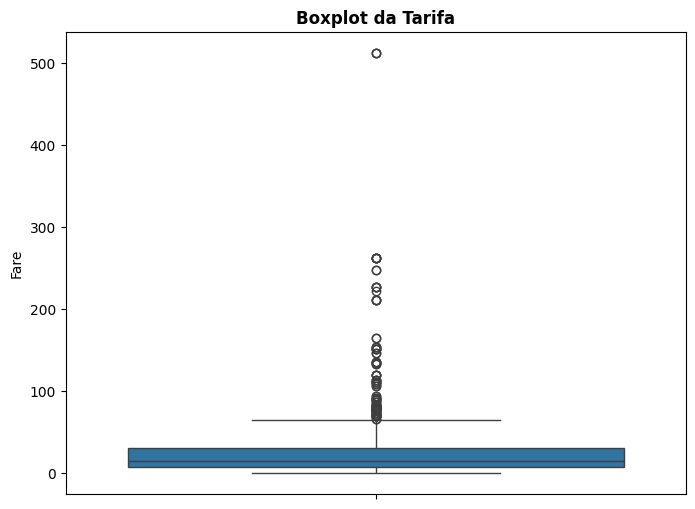

In [183]:
# Como podemos ver, há presença de outliers nas tarifas, vamos tratá-los

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Fare'])
plt.title('Boxplot da Tarifa', fontweight="bold")
plt.show()

In [184]:
# Criando uma máscara para saber quais colunas tem o Outlier de uma tarifa absurdamente cara
mask = df[df['Fare'] >= 512]
mask

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,1,1,"Ward, Miss. Anna",1,35,0,0,PC 17755,512.3292,C
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",0,36,0,1,PC 17755,512.3292,C
737,1,1,"Lesurer, Mr. Gustave J",0,35,0,0,PC 17755,512.3292,C


In [185]:
# Pegando os outliers com a maior tarifa e removendo do dataset, depois eu só testo se realmente foi
for i in range(3):
  indice_max_fare = df['Fare'].idxmax()
  df.drop(indice_max_fare, inplace=True)
df["Fare"].max()

263.0

In [186]:
# Por último vamos dar um df, para ver como ficou o nosso dataset após as nossas modificações
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",0,26,0,0,111369,30.0000,C


### 1.3 - Análise Exploratória dos Dados
---

#### Ufa! Finalmente demos uma bela limpada naquela bagunça, agora é hora de **REALMENTE** dar uma olhada no que tá acontecendo aqui. A primeira coisa que vamos fazer é procurar algumas correlações e analizar as distribuições das features que estão presentes nesse dataset. Pra fazer isso, recomendo usar a biblioteca `matplotlib.pyplot` para criar gráficos que representem estas medidas. Agora, se você conhecer alguma outra ferramenta que te ajude aqui, pode ir fundo nela!
Lembrando, use todos os gráficos que achar necessário, mas não precisa exagerar também, beleza?
Ajude seu monitor! 💀

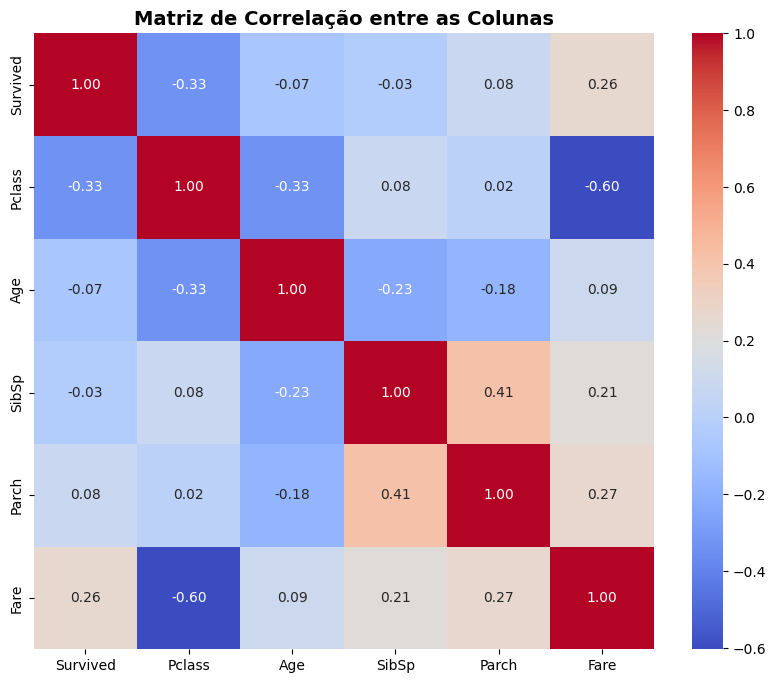

In [187]:
# Gráfico de correlação -> aqui podemos ver a relação entre cada uma das colunas e os seus valores
data = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre as Colunas', fontweight="bold", fontsize=14)
plt.show()

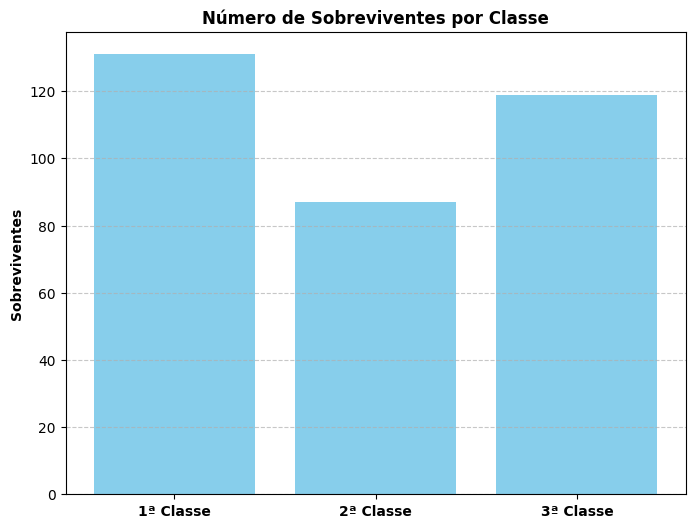

In [188]:
# Número de sobreviventes por classe no navio
survivors_by_class = df.groupby('Pclass')['Survived'].sum()

plt.figure(figsize=(8, 6))
plt.bar(survivors_by_class.index, survivors_by_class.values, color='skyblue')
plt.title('Número de Sobreviventes por Classe', fontweight="bold")
plt.ylabel('Sobreviventes', fontweight="bold")
plt.xticks([1, 2, 3], ['1ª Classe', '2ª Classe', '3ª Classe'], fontweight="bold")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

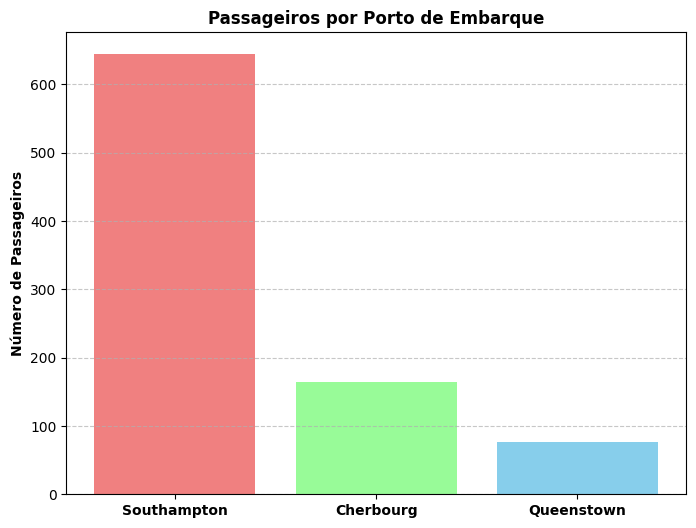

In [189]:
# Número de Embarcados por Porto
colors = ['lightcoral', 'palegreen', 'skyblue']

embarked_counts = df['Embarked'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(embarked_counts.index, embarked_counts.values, color=colors)
plt.title('Passageiros por Porto de Embarque', fontweight="bold")
plt.ylabel('Número de Passageiros', fontweight="bold")
plt.xticks(['C', 'Q', 'S'], ['Cherbourg', 'Queenstown', 'Southampton'], fontweight="bold")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

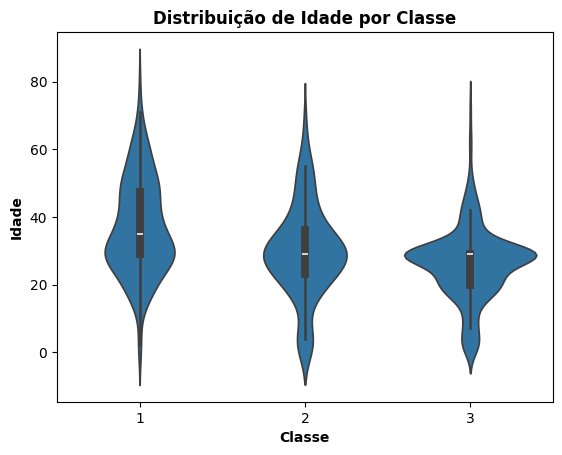

In [190]:
# Distribuição de idade por classe no navio
sns.violinplot(x='Pclass', y='Age', data=df)
plt.title('Distribuição de Idade por Classe', fontweight="bold")
plt.xlabel('Classe', fontweight="bold")
plt.ylabel('Idade', fontweight="bold")
plt.show()

### 1.4 - Feature Engineering e Dados Categóricos
---

#### 1.4.1 - Sempre que falamos de _Data Science_, já lembramos de tipos diferentes de dados, e com eles, sempre vem os temidos dados categórios. Esse tipo de dados normalmente apresenta uma forma muito diferente de variáveis numéricas, e por consquência, trabalhar com eles tabém exige um cuidado a mais. Por isso, agora vamos transformar alguns desses dados usando os métodos que a gente aprendeu hoje, um deles sendo o OneHotEncoder. Eai, ainda lembra como ele funciona? 🤔

#### Após isso, vamos fazer o _Feature Engineering_! Essa é uma técnica **PODEROSÍSSIMA** que vai ajudar a gente a conseguir algumas outras informações que vimos ser possíveis de extrair no passo `1.3`.
Agora, basta usar sua intuição e criatividade para decidir como novos atributos podem ser definidos, a partir das informações que já temos.

Dica: Use as colunas existentes para gerar uma ou mais colunas com atributos distintos dos primeiros.

In [191]:
# Criando coluna para faixa etária de cada passageiro
age_bins = [0, 12, 18, 30, 60, 100]
age_labels = ['Criança', 'Adolescente', 'Jovem', 'Adulto', 'Idoso']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,S,Jovem
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C,Adulto
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,S,Jovem
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,S,Adulto
4,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,S,Adulto
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27,0,0,211536,13.0000,S,Jovem
887,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,112053,30.0000,S,Jovem
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29,1,2,W./C. 6607,23.4500,S,Jovem
889,1,1,"Behr, Mr. Karl Howell",0,26,0,0,111369,30.0000,C,Jovem


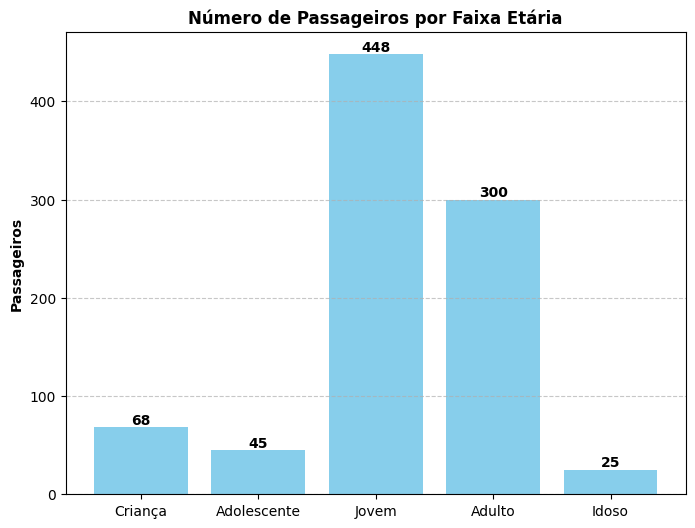

In [192]:
# Contar o número de passageiros em cada faixa etária
age_group_counts = df['AgeGroup'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
bars = plt.bar(age_group_counts.index, age_group_counts.values, color='skyblue')
plt.title('Número de Passageiros por Faixa Etária', fontweight="bold")
plt.ylabel('Passageiros', fontweight="bold")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Colocar a quantidade de passageiros em cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontweight="bold")

plt.show()

1.4.2 - Em poucos termos, computadores não conseguem entender texto de maneira alguma, mas números, ah, esses as máquinas entendem bem pra caramba!
Então, que tal usar as técnicas que aprendemos pra deixar tudo necessário em números?

Dica: Sempre que temos uma feature categórica que possui apenas 2 elementos, podemos transformar ela em uma flag binária!
Agora o que isso significa eu deixo pra você pesquisar 😉

In [195]:
# Aplicar One-Hot Encoding para a coluna 'Embarked'
df_encoded = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')

# Converter para 0 e 1
df_encoded[['Embarked_C', 'Embarked_Q', 'Embarked_S']] = df_encoded[['Embarked_C', 'Embarked_Q', 'Embarked_S']].astype(int)

df_encoded

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,AgeGroup,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,Jovem,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,Adulto,1,0,0
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,Jovem,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,Adulto,0,0,1
4,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,Adulto,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27,0,0,211536,13.0000,Jovem,0,0,1
887,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,112053,30.0000,Jovem,0,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29,1,2,W./C. 6607,23.4500,Jovem,0,0,1
889,1,1,"Behr, Mr. Karl Howell",0,26,0,0,111369,30.0000,Jovem,1,0,0
